<h1>Práctica 2</h1>

<i>
Maximiliano Vaca Montejano <br>
364897 <br>
maximiliano.vaca@uabc.edu.mx
</i>

<i>Profesor: Andrés García Medina <br>
andres.garcia.medina@uabc.edu.mx <br>
Fecha de entrega: jueves 29 de febrero, 2024 (12pm) </i>

<h2>Ejercicio 1 </h2>
Considere nuevamente el modelo del ejercicio 2 de la practica 1 dado por: 

$$ dist_i = \beta_0 + \beta_1 speed_i + \beta_2 speed_i^2 + \epsilon$$

In [3]:
data(cars)
head(cars)

,speed,dist
,<dbl>,<dbl>
1,4,2
2,4,10
3,7,4
4,7,22
5,8,16
6,9,10


<b>(a) Usar el metodo pairs para graficar los datos e interpretar. </b>

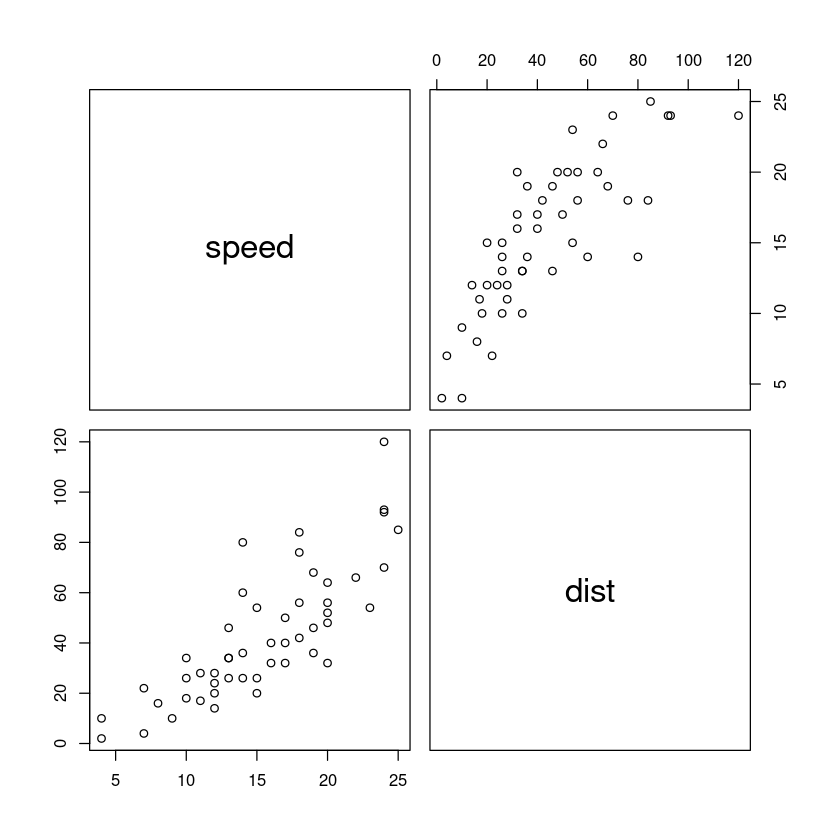

In [4]:
pairs(cars)

<b>(b) Graficar la matriz de covarianza de la matriz de diseño asociada X como un mapa de calor con la función heatmap.


In [5]:
cov( cars )

,speed,dist
speed,27.95918,109.9469
dist,109.94694,664.0608


<b>(c) Estimar el vector β del modelo via la factorización QR y comparar con resultado de la función lm. Se puede apoyar de la función qr.


<b>(d) Historicamente la solución  ́optima del vector β está dada por la expresión: 
β = (XT X)−1XT y. 
Estimar el vector β via la expresion anterior (método clásico) y comparar con los resultados obtenidos via qr y la función lm.


<b>(e) Grafique los residuales del modelo ajustado ¿Cumplen con los supuestos
distribucionales? ¿Con esta información como estimar ́ıa la desviación
estándar de cada elemento de β?